In [2]:
import torch 
import torchvision
from torchvision import transforms
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
train_set = torchvision.datasets.MNIST('../../data',train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.MNIST('../../data',train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:01<00:00, 5124319.00it/s]


Extracting ../../data\MNIST\raw\train-images-idx3-ubyte.gz to ../../data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 7237166.56it/s]

Extracting ../../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../../data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3026529.11it/s]


Extracting ../../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../../data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../../data\MNIST\raw



In [4]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=256,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=256,shuffle=True)

In [5]:
model = torch.nn.Sequential(
    nn.Linear(784,256),
    nn.Linear(256,128),
    nn.Linear(128,64),
    nn.Linear(64,10)
)

In [6]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.05)

In [7]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Accuray is 0.1484375
Prediction is 3 
Correct Label is 7


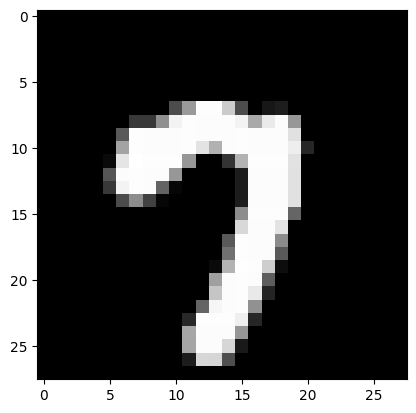

In [8]:
image,label = next(iter(test_loader))
print(f"Accuray is {accuracy(model(image.reshape(-1,784)),label)}")
output = model(image[0].reshape(-1,784))   
plt.imshow(image[0].permute(1,2,0),cmap='gray')
_,pred = torch.max(output,dim=1)
print(f"Prediction is {pred[0]} \nCorrect Label is {label[0]}")

In [9]:
num_epochs = 300
prog_bar = tqdm(range(num_epochs))
for epoch in prog_bar:
    images,labels =  next(iter(train_loader))
    images = images.reshape(-1,784)
    output = model(images)
    loss = torch.nn.functional.cross_entropy(output,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    prog_bar.set_description(desc=f"Loss: {loss.item()}")
        

Loss: 0.38166114687919617: 100%|██████████| 300/300 [00:18<00:00, 16.60it/s]


Accuray is 0.85546875
Prediction is 9 
Correct Label is 9


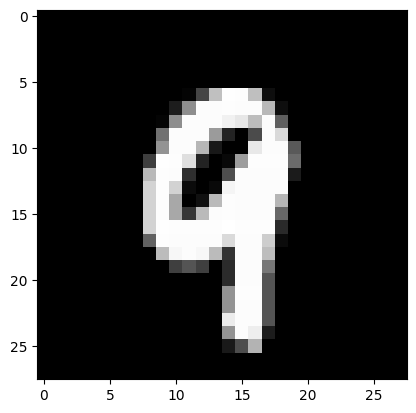

In [13]:
image,label = next(iter(test_loader))
randindex = 10
print(f"Accuray is {accuracy(model(image.reshape(-1,784)),label)}")
a = model(image.reshape(-1,784))
plt.imshow(image[randindex].permute(1,2,0),cmap='gray')
_,pred = torch.max(a,dim=1)
print(f"Prediction is {pred[randindex]} \nCorrect Label is {label[randindex]}")

In [11]:
# from PIL import Image
# tt = transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor()])
# img = Image.open('untitled.png').convert("L")
# n = tt(img)
# n = n.unsqueeze(0)
# print(n.reshape(-1,784).shape)
# t = model(n.reshape(-1,784))
# print(t)
# _,p = torch.max(t,dim=1)
# print(p)
# plt.imshow(n[0].permute(1,2,0),cmap='gray')